In [1]:
# Scientific libraries
import numpy as np

# Graphic libraries
%matplotlib notebook
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(context='notebook', fscale=1)


from glob import glob
import copy
import collections
from electradpy import sic_glue

#import warnings
#warnings.simplefilter('ignore')
sic = sic_glue.pySIC_Powerlaw(1.E10)
ene = np.logspace(1,5,100)

<IPython.core.display.Javascript object>


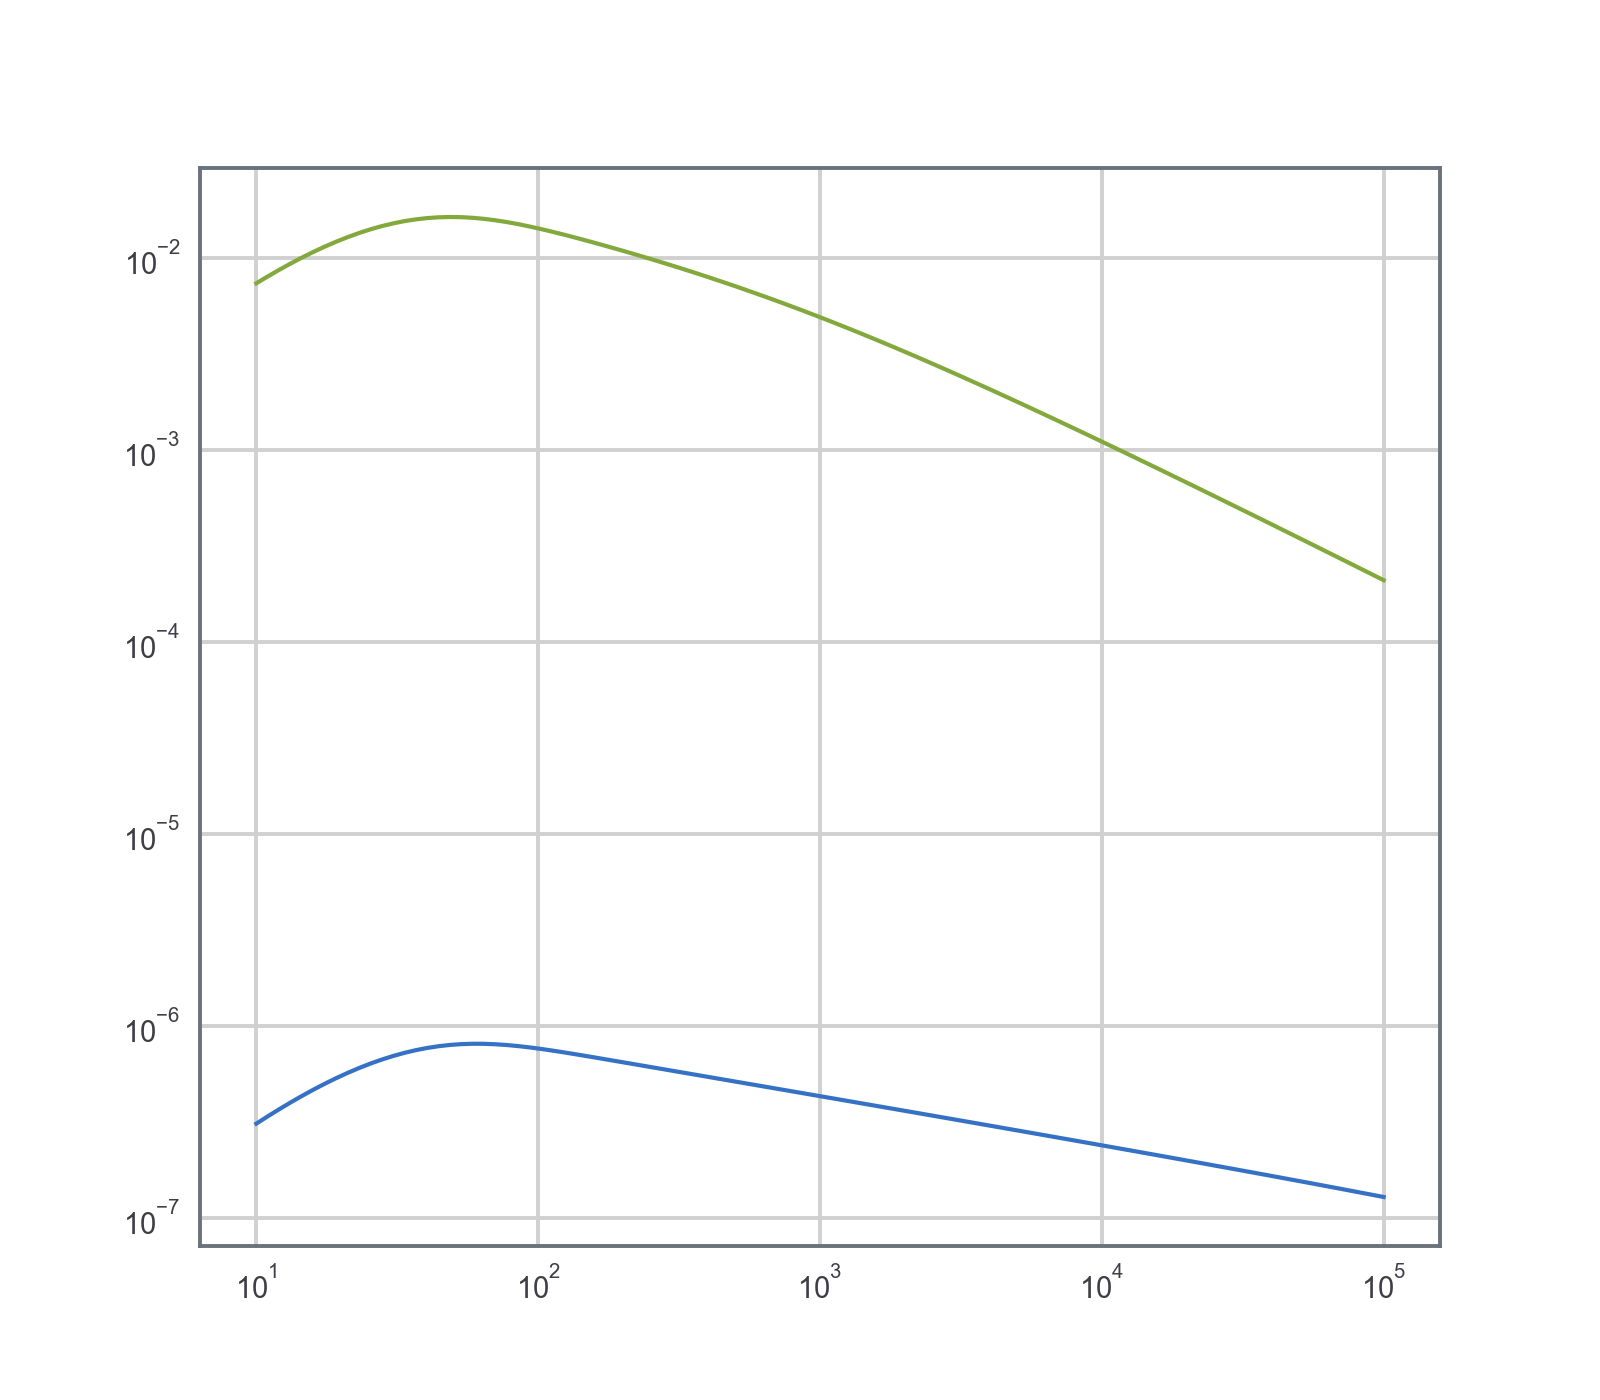

In [2]:
fig, ax = plt.subplots()

sic.set_power_law(1.E1, 1.E5, 1.E10,3.5)

ax.loglog(ene, ene**2 * sic.photons(ene,5E4,5))
sic.reset()

#sic.set_power_law(1.E1, 1.E5, 1.E10, 3.5)

ax.loglog(ene, ene**2 * sic.photons(ene,5E4,1000))


<IPython.core.display.Javascript object>


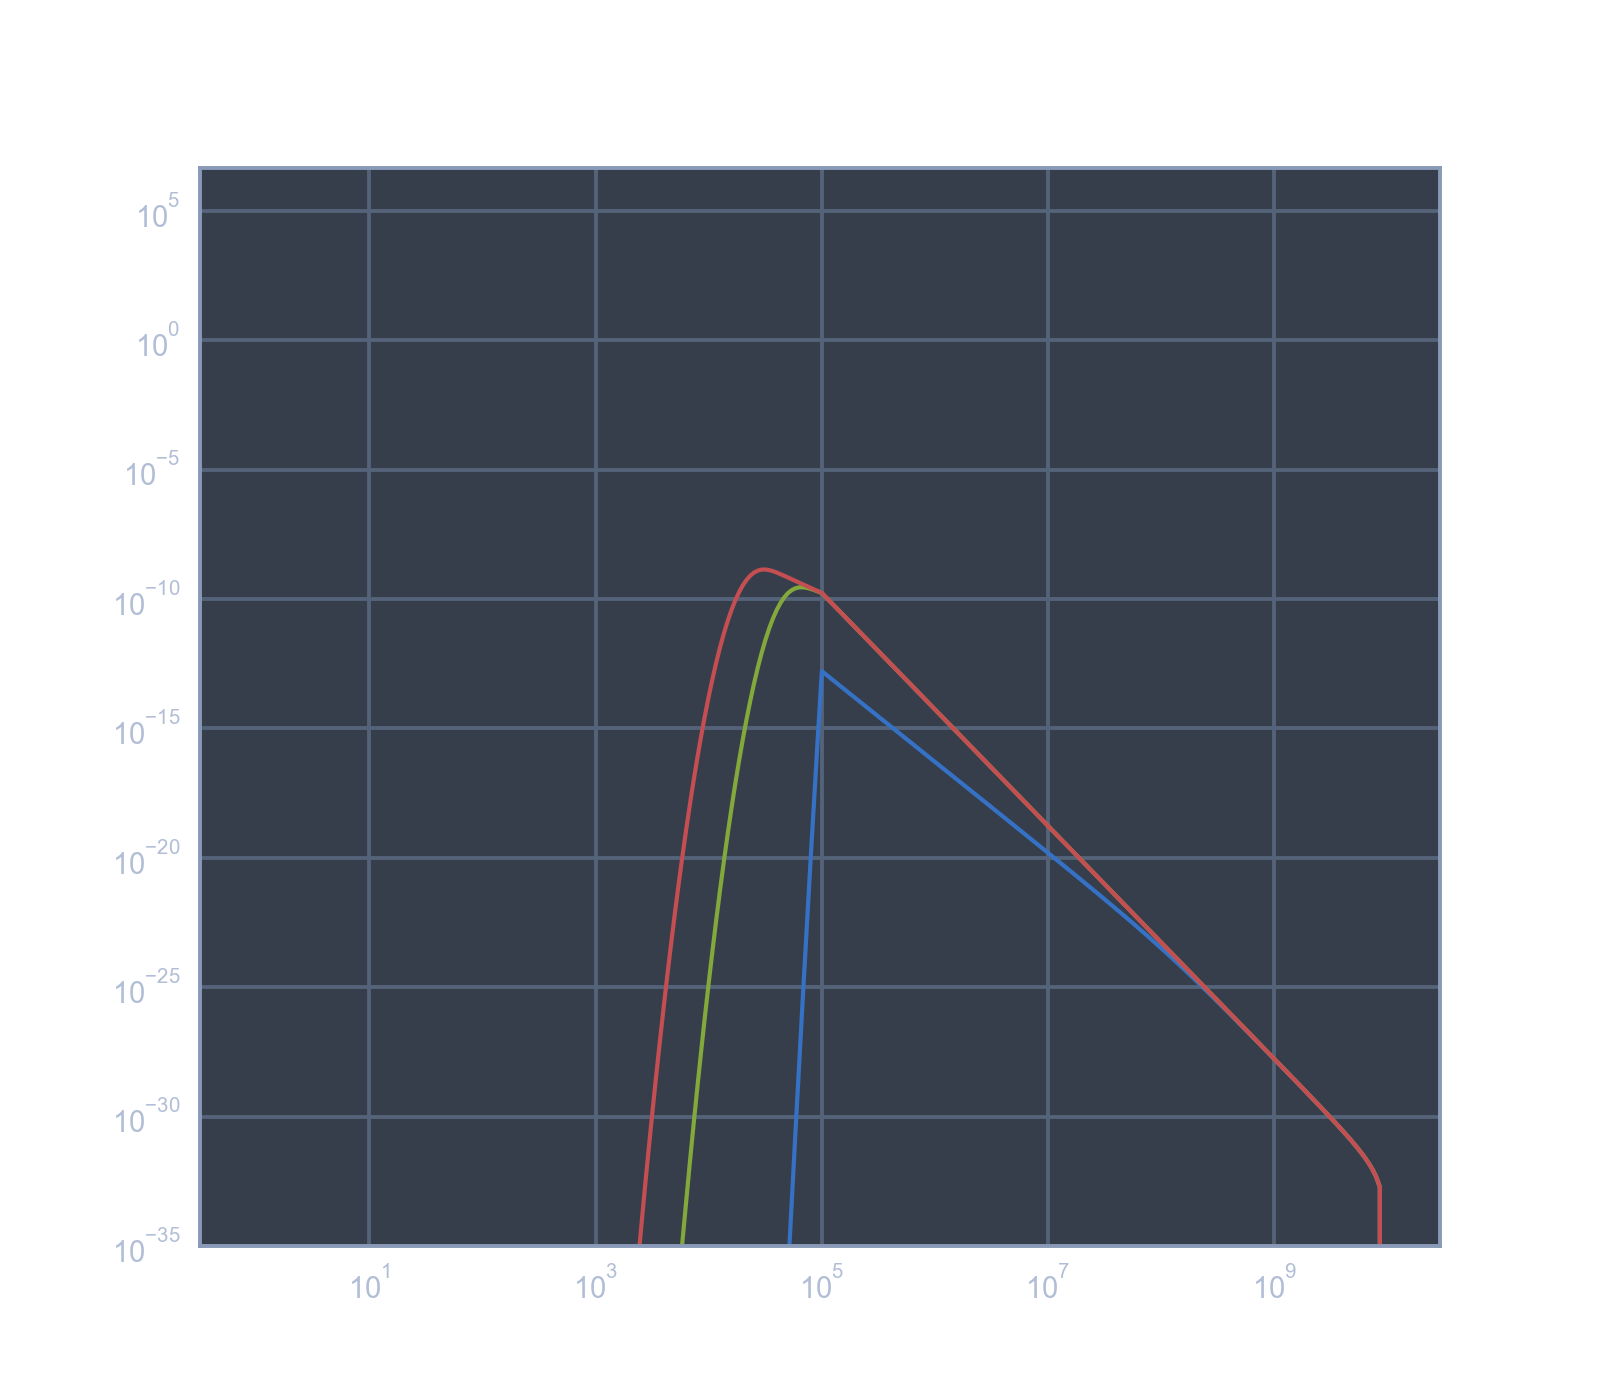

(1e-35, 4490003.4900315413)

In [3]:
fig,ax =plt.subplots()
sic.reset()


_ = sic.photons(ene,5E4,1)
ax.loglog(sic.gamma,sic.electrons)
_ = sic.photons(ene,5E4,5000)
ax.loglog(sic.gamma,sic.electrons)

_ = sic.photons(ene,5E4,10000)
ax.loglog(sic.gamma,sic.electrons)



ax.set_ylim(1E-35)

In [21]:
sic.reset()
%timeit sic.photons(ene,5E4,2)

100 loops, best of 3: 2.12 ms per loop


In [4]:
sic.photons?

In [17]:
from synchrotron_models import SynchrotronNumerical
import numpy as np
ene = np.logspace(1,5,100)

In [5]:
from astromodels import *

In [9]:
ss= SynchrotronNumerical()

ss.gamma_cool = 5E6

In [19]:
with use_astromodels_memoization(False):

    ss.gamma_cool = 4E7
    %timeit ss(ene)

1000 loops, best of 3: 1.72 ms per loop


In [5]:
with use_astromodels_memoization(False):

    ss.gamma_cool = 4E6
    %timeit ss(ene)

100 loops, best of 3: 2.27 ms per loop


In [20]:
ss.gamma_max.value /ss.gamma_cool.value

2.5

In [7]:
with use_astromodels_memoization(False):

    ss.gamma_cool = 4E4
    %timeit ss(ene)

10 loops, best of 3: 60.4 ms per loop


In [8]:
ss.gamma_cool = 5E3
%timeit ss(ene)

The slowest run took 4.18 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 23 µs per loop


<IPython.core.display.Javascript object>


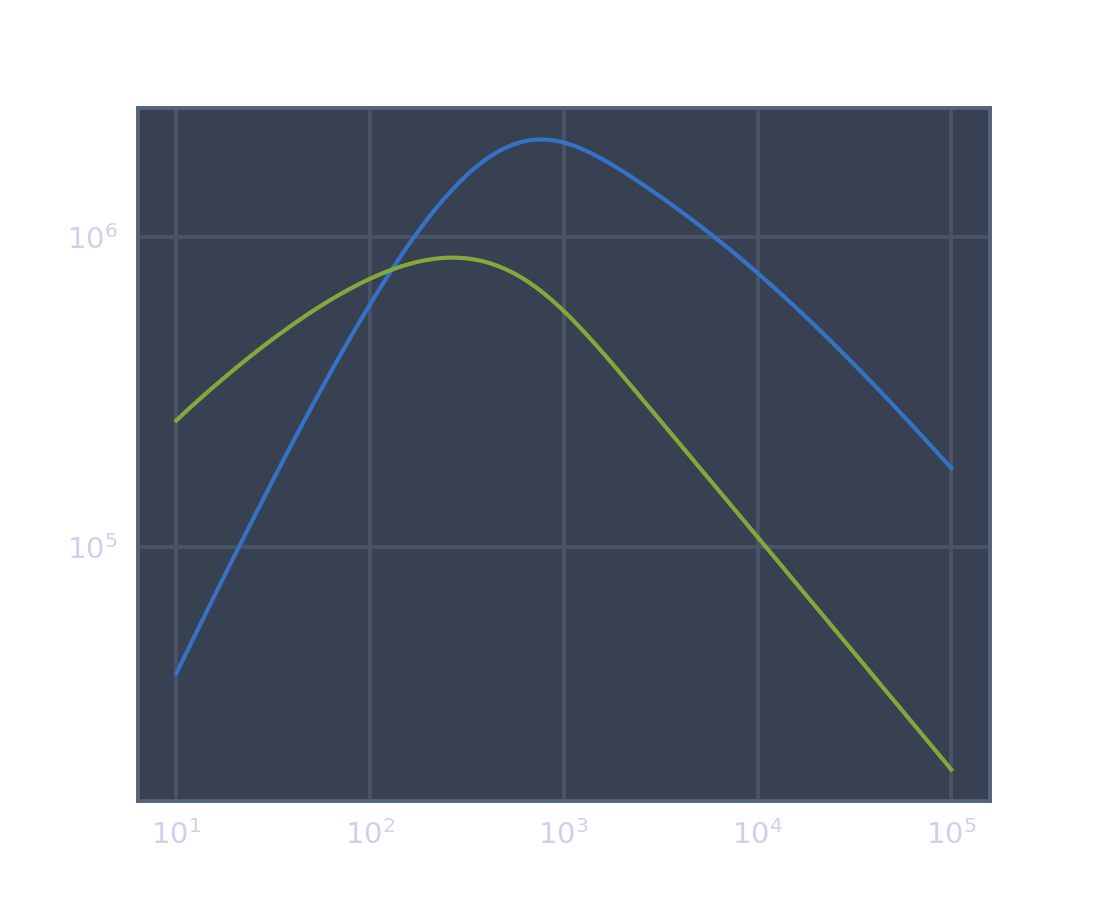

In [5]:
fig, ax = plt.subplots()

ss.gamma_cool = 5E6
ax.loglog(ene,ene**2 * ss(ene))

ss.gamma_cool = 5E4
ax.loglog(ene,ene**2 * ss(ene))

In [6]:
%timeit ss(ene)

The slowest run took 4535.30 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 22.3 µs per loop


In [4]:
ss(ene)


array([  3.92015561e+02,   3.66526073e+02,   3.42571340e+02,
         3.20059307e+02,   2.98903485e+02,   2.79022619e+02,
         2.60340382e+02,   2.42785080e+02,   2.26289376e+02,
         2.10790041e+02,   1.96227706e+02,   1.82546638e+02,
         1.69694532e+02,   1.57622311e+02,   1.46283938e+02,
         1.35636244e+02,   1.25638769e+02,   1.16253600e+02,
         1.07445238e+02,   9.91804551e+01,   9.14281739e+01,
         8.41593449e+01,   7.73468350e+01,   7.09653195e+01,
         6.49911799e+01,   5.94024047e+01,   5.41784933e+01,
         4.93003614e+01,   4.47502474e+01,   4.05116181e+01,
         3.65690728e+01,   3.29082459e+01,   2.95157054e+01,
         2.63788486e+01,   2.34857937e+01,   2.08252680e+01,
         1.83864937e+01,   1.61590724e+01,   1.41328715e+01,
         1.22979149e+01,   1.06442812e+01,   9.16201609e+00,
         7.84106128e+00,   6.67120640e+00,   5.64206756e+00,
         4.74309604e+00,   3.96361876e+00,   3.29290991e+00,
         2.72029071e+00,

In [ ]:
from astromodels import Function1D, FunctionMeta

class SynchrotronNumerical(Function1D):
    r"""
    description :
        Synchrotron emission from cooling electrions
    latex : $  $
    parameters :
        K :
            desc : normalization
            initial value : 1
            min : 0
    
        B :
            desc : energy scaling
            initial value : 1E2
            min : .01
          
  
        index:
            desc : spectral index of electrons
            initial value : 3.5
            min : 2.
            max : 6
      
        
        gamma_min:
            desc : minimum electron lorentz factor
            initial value : 5E5
            min : 1
            fix: yes
    
        gamma_cool : 
                desc: cooling time of electrons
                initial value: 9E7
                min value: 5E2
         
    
    
        gamma_max:
            desc : minimum electron lorentz factor
            initial value : 1E8
            min : 1E6
            fix: yes
      
 
    """

    __metaclass__ = FunctionMeta

    def _set_units(self, x_unit, y_unit):

        self.K.unit = y_unit / u.gauss

        self.B.unit = u.gauss

        self.gamma_min.unit = u.dimensionless_unscaled
        self.gamma_min.unit = u.dimensionless_unscaled
        self.gamma_max.unit = u.dimensionless_unscaled
        self.index.unit = u.dimensionless_unscaled

    def evaluate(self, x, K, B, index, gamma_min, gamma_cool, gamma_max):

        bulk_gamma = 300.
        const_factor = 1.29234E-9
        n_grid = 300
        norm_factor = 1e11

        if isinstance(K, u.Quantity):

            flag = True

            B_ = B.value
            gamma_min_ = gamma_min.value
            gamma_max_ = gamma_max.value
            gamma_cool_ = gamma_cool.value
            index_ = index.value
            unit_ = self.y_unit
            K_ = K.value

            try:
                flag = False
                tmp = len(x)

                x_ = x.value

            except:
                flag = True
                x_ = np.array([x.value])

        else:

            flag = False

            K_, B_, gamma_min_, gamma_cool_, gamma_max_, index_, x_ = K, B, gamma_min, gamma_cool, gamma_max, index, x
            unit_ = 1.0

        # compute the synchrotron cooling time of the highest
        # energy electron
        sync_cool = 1. / (B_ * B_ * const_factor)

        ratio = gamma_max_ / gamma_cool_

        # now we want the total time
        # for an electron at gamma_cool to
        # cool and find out the number of
        # steps that will require

        steps = np.round(ratio)
        
        norm = bulk_gamma * B_ * 3.7797251E-22
        erg2keV = 6.242E8
        if steps == 0:
            out = np.zeros_like(x)
        dt = sync_cool / (gamma_max_)


        norm = bulk_gamma * B_ * 3.7797251E-22
        erg2keV = 6.242E8
        if steps == 0:
            out = np.zeros_like(x)

            

            
        else:



            out = K_ * erg2keV * norm * np.array(
                emission(x_, 1., B_, bulk_gamma, gamma_min_, gamma_max_,
                         index_, dt, n_grid, steps, 0))

        return out * unit_ * norm_factor * gamma_cool_**1.5 / gamma_max_
